In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#define folder path 
folder_path = 'Intro_to_ML/data/PGA STAT 2024'

#list all the csv files
csv_files = [files for files in os.listdir(folder_path) if files.endswith('.csv')]

print (csv_files)

#loop through each csv files

dfs = []

for files in csv_files:
    file_path = os.path.join(folder_path, files)
    df = pd.read_csv(file_path)
    dfs.append(df)

#Combine all the dataframe inside the dfs list into one

combined_df = pd.concat(dfs, ignore_index = True, sort = False)
combined_df.info()


['Putting AVG: Birdie Conversion%.csv', 'Par 3 Scoring.csv', 'GIR% on Fairway.csv', '3 Putts per round.csv', 'SG Putting.csv', 'Par 5 Scoring.csv', 'SG APP.csv', 'GIR%.csv', 'Scoring Average Adjusted.csv', 'Scrambling% from sand.csv', 'Scrambling from rough.csv', 'SG ARG.csv', 'Putts per round.csv', 'Drive Distance.csv', 'SG Drive.csv', 'Scrambling%.csv', 'Overall Putting AVG.csv', 'GIR% off Fairway.csv', 'Par 4 Scoring.csv', 'SG Total.csv', 'Drive Accuracy.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3738 entries, 0 to 3737
Columns: 113 entries, REMOVE11a to REMOVE2d
dtypes: float64(103), int64(1), object(9)
memory usage: 3.2+ MB


In [2]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', None)

print(combined_df)

      REMOVE11a  REMOVE11b  PLAYER_ID                     PLAYER  Putting_AVG  \
0           1.0        0.0      46046          Scottie Scheffler        1.690   
1           2.0        0.0      51766              Wyndham Clark        1.702   
2           3.0        2.0      47993             Denny McCarthy        1.710   
3           4.0       -2.0      50525            Collin Morikawa        1.711   
4           5.0        1.0      45522    Christiaan Bezuidenhout        1.713   
5           6.0       -2.0      46717             Viktor Hovland        1.714   
6           6.0        1.0      34046              Jordan Spieth        1.714   
7           8.0        2.0      47504                  Sam Burns        1.716   
8           9.0        3.0      40250            Taylor Pendrith        1.721   
9          10.0       -2.0      28089                  Jason Day        1.722   
10         11.0       -1.0      34098             Russell Henley        1.724   
11         11.0        4.0  

In [3]:
aggregated_df = combined_df.groupby("PLAYER_ID", as_index = False).first()
aggregated_df.to_csv('aggregated_df.csv', index = False)
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Columns: 113 entries, PLAYER_ID to REMOVE2d
dtypes: float64(103), int64(1), object(9)
memory usage: 157.3+ KB


In [6]:
#drop column
column_index = []
aggregated_df = aggregated_df.drop(aggregated_df.columns[column_index], axis = 1)



In [7]:
df = pd.read_csv('aggregated_df.csv')
df.sort_index(axis=1, inplace = True)
df.to_csv('aggregated_df_ordered.csv', index = False)

In [12]:
df = pd.read_csv('aggregated_df_ordered.csv')

#remove columns that we dont want
columns_to_drop = ['REMOVE10a','REMOVE10b','REMOVE10c','REMOVE10d',
                   'REMOVE11a','REMOVE11b','REMOVE11c','REMOVE11d',
                   'REMOVE12a','REMOVE12b','REMOVE12c','REMOVE12d','REMOVE12e',
                   'REMOVE13a','REMOVE13b','REMOVE13c','REMOVE13d','REMOVE13e',
                   'REMOVE14a','REMOVE14b','REMOVE14c','REMOVE14d',
                   'REMOVE15a','REMOVE15b','REMOVE15c','REMOVE15d',
                   'REMOVE16a','REMOVE16b','REMOVE16c','REMOVE16d',
                   'REMOVE17a','REMOVE17b','REMOVE17c','REMOVE17d',
                   'REMOVE18a','REMOVE18b','REMOVE18c','REMOVE18d',
                   'REMOVE19a','REMOVE19b','REMOVE19c','REMOVE19d',
                   'REMOVE1a','REMOVE1b','REMOVE1c','REMOVE1d',
                   'REMOVE20a','REMOVE20b','REMOVE20c','REMOVE20d',
                   'REMOVE21a','REMOVE21b','REMOVE21c','REMOVE21d','REMOVE21e','REMOVE21f',
                   'REMOVE2a','REMOVE2b','REMOVE2c','REMOVE2d',
                   'REMOVE3a','REMOVE3b','REMOVE3c','REMOVE3d',
                   'REMOVE4a','REMOVE4b','REMOVE4c','REMOVE4d',
                   'REMOVE5a','REMOVE5b','REMOVE5c','REMOVE5d',
                   'REMOVE6a','REMOVE6b','REMOVE6c','REMOVE6d',
                   'REMOVE7a','REMOVE7b','REMOVE7c','REMOVE7d',
                   'REMOVE8a','REMOVE8b','REMOVE8c','REMOVE8d',
                   'REMOVE9a','REMOVE9b','REMOVE9c','REMOVE9d',
#temp
                   'Fairway%','GIR%','GIR_off_Fairway%',
                   'GIR_on_Fairway%','PLAYER','Putting_Birdie_Conversions',
                   'Scrambling%','Scrambling_Rough%','Scrambling_Sand%',
                   ]
df.drop(columns = columns_to_drop, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   3Putts_AVG           178 non-null    float64
 1   Driver_Distance_AVG  178 non-null    float64
 2   GIR_RELATIVE/PAR     178 non-null    float64
 3   PLAYER_ID            178 non-null    int64  
 4   Par3_AVG             178 non-null    float64
 5   Par4_AVG             178 non-null    float64
 6   Par5_AVG             178 non-null    float64
 7   Putting_AVG          178 non-null    float64
 8   Putts_Overall_AVG    178 non-null    float64
 9   SG_APP_AVG           178 non-null    float64
 10  SG_ARG_AVG           178 non-null    float64
 11  SG_DRIVE_AVG         178 non-null    float64
 12  SG_PUTTING_AVG       178 non-null    float64
 13  SG_TOTAL_AVG         178 non-null    float64
 14  Strokes_Adj_AVG      178 non-null    float64
 15  Total_Putts_AVG      178 non-null    flo

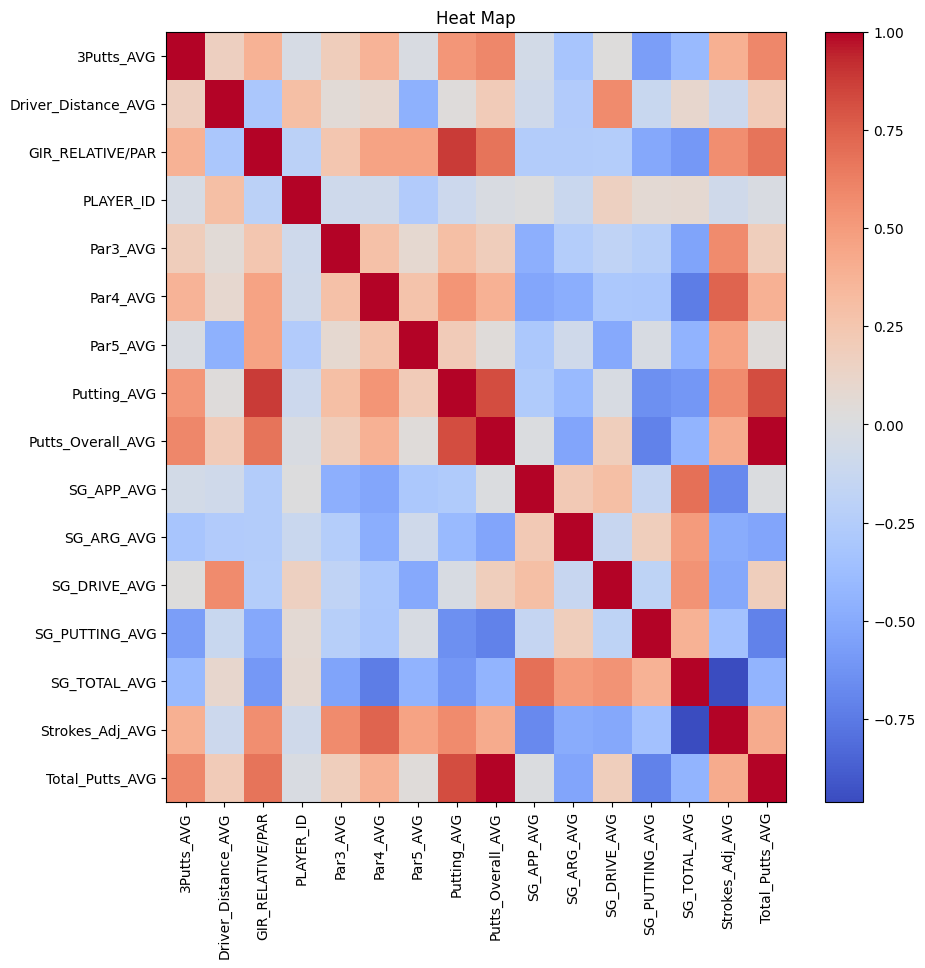

In [14]:
correlation_matrix = df.corr()

#plotting the heat map 

plt.figure(figsize= (10, 10))
plt.imshow(correlation_matrix, cmap = 'coolwarm', interpolation='none', aspect='auto')
plt.colorbar()

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix, rotation = 90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix)
plt.title("Heat Map")
plt.show()

In [ ]:
#remove %

def remove_sign(df):
    for x in df.columns:
        if df[x].dtype == 'object':
            df[x] = df[x].replace['%',''].str.replace['"', '']
    return df




In [ ]:
df = remove_sign(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   # OF SHOTS(5)             177 non-null    float64
 1   AVG_STROKE                177 non-null    float64
 2   AVG_SG_PUTTING            177 non-null    float64
 3   AVG_DRIVING_DISTANCE      177 non-null    float64
 4   AVG_SG                    177 non-null    float64
 5   AVG_UNADJUSTED_STROKE     177 non-null    float64
 6   AVG_ARG                   177 non-null    float64
 7   AVG_APP                   177 non-null    float64
 8   AVG_COMBINED              177 non-null    float64
 9   AVG_OTT                   177 non-null    float64
 10  FAIRWAYS HIT(11)          177 non-null    float64
 11  GREENS HIT(7)             177 non-null    float64
 12  MISSED GIR(4)             177 non-null    float64
 13  PAR OR BETTER(4)          177 non-null    float64
 14  RELATIVE/P

In [ ]:
#Machine Learning Training